<a href="https://colab.research.google.com/github/RANJEETH-RIKKALA/FINANCIAL_ENGINEERING_WITH_AI/blob/DEV_RIKKALA_1.28.2026/Financial_Data_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## DATA Download

In [19]:
!wget -nc https://lazyprogrammer.me/course_files/all_stocks_5yr.csv

File ‘all_stocks_5yr.csv’ already there; not retrieving.



## DATA EXPLORATION

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
data = pd.read_csv('all_stocks_5yr.csv',parse_dates=True)

In [22]:
sbux = data[data['Name']=='SBUX'].copy()
sbux.head()

,date,open,high,low,close,volume,Name
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX


<Axes: >

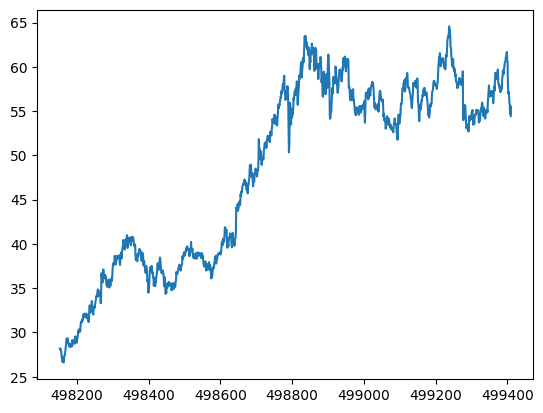

In [23]:
sbux['close'].plot()

In [24]:
sbux['prev_close'] = sbux['close'].shift(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915


In [25]:
sbux['return'] = (sbux['close'] / sbux['prev_close']) - 1
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015


In [26]:
sbux['return2'] = sbux['close'].pct_change(1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015


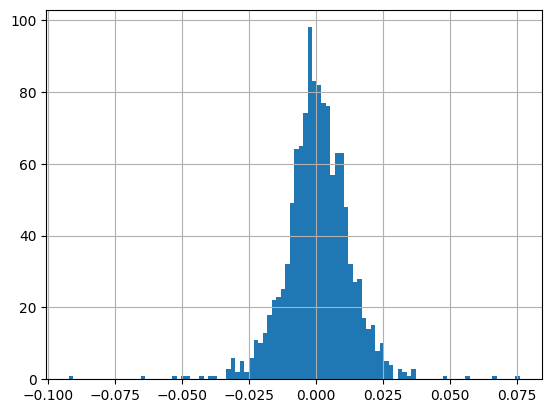

In [27]:
sbux['return'].hist(bins=100);

In [28]:
sbux['return'].mean() , sbux['return'].std()

(np.float64(0.0006002332205830914), 0.012360934026133882)

In [29]:
sbux['log_return'] = np.log(sbux['return'] + 1)
sbux.head()

,date,open,high,low,close,volume,Name,prev_close,return,return2,log_return
498152,2013-02-08,27.920,28.325,27.920,28.185,7146296,SBUX,NaN,NaN,NaN,NaN
498153,2013-02-11,28.260,28.260,27.930,28.070,5457354,SBUX,28.185,-0.004080,-0.004080,-0.004089
498154,2013-02-12,28.000,28.275,27.975,28.130,8665592,SBUX,28.070,0.002138,0.002138,0.002135
498155,2013-02-13,28.230,28.230,27.750,27.915,7022056,SBUX,28.130,-0.007643,-0.007643,-0.007672
498156,2013-02-14,27.765,27.905,27.675,27.775,8899188,SBUX,27.915,-0.005015,-0.005015,-0.005028


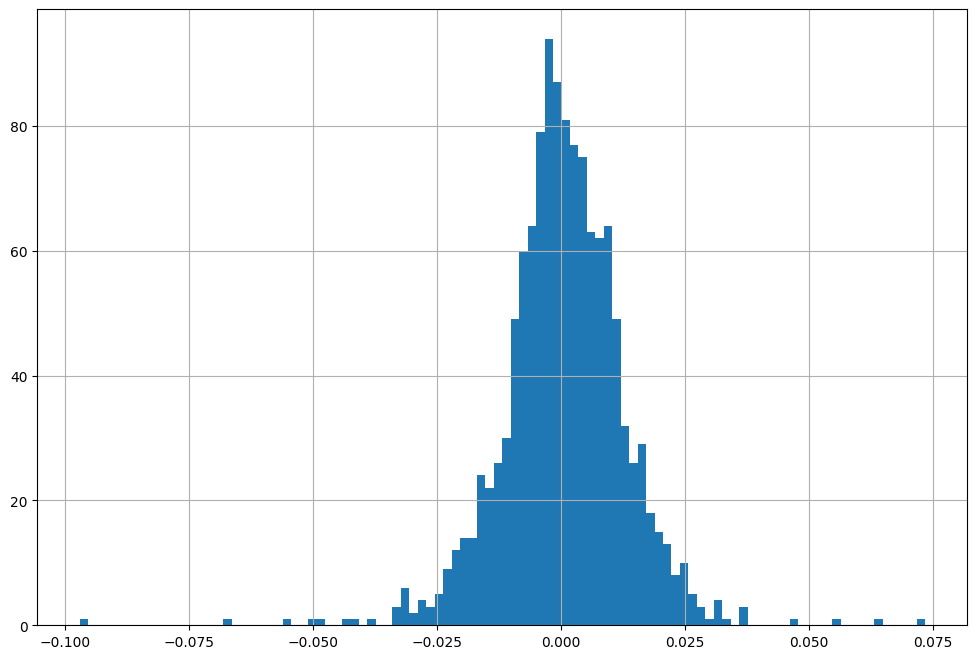

In [30]:
sbux['log_return'].hist(bins=100,figsize=(12,8));

In [31]:
sbux['log_return'].mean() , sbux['log_return'].std()

(np.float64(0.0005235902748108682), 0.012381234216101253)

## Normal Distribution

In [32]:
from scipy.stats import norm

In [33]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [34]:
y_list = norm.pdf(x_list,
                  loc = sbux['return'].mean(),
                  scale = sbux['return'].std())

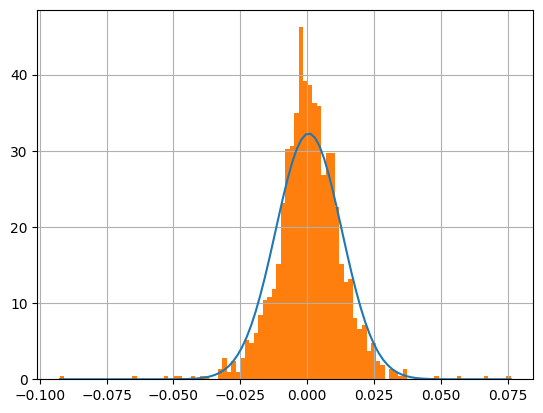

In [35]:
plt.plot(x_list,y_list);
sbux['return'].hist(bins=100,density=True);

## Q-Q Plot

In [36]:
from scipy.stats import probplot

((array([-3.26318411, -3.00291115, -2.85798028, ...,  2.85798028,
          3.00291115,  3.26318411]),
  array([-0.09243697, -0.06519128, -0.05321627, ...,  0.05617538,
          0.06623157,  0.0761332 ])),
 (np.float64(0.012069021175478527),
  np.float64(0.0006002332205830934),
  np.float64(0.9745536080830227)))

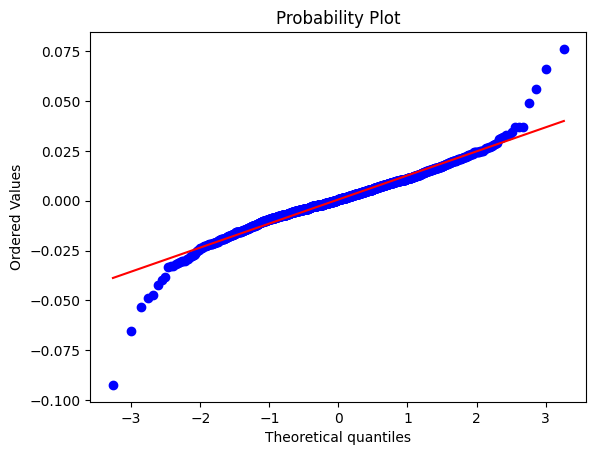

In [37]:
probplot(sbux['return'].dropna(), dist='norm', fit=True, plot=plt)

## Q-Q plot with statsmodels

In [38]:
import statsmodels.api as sm

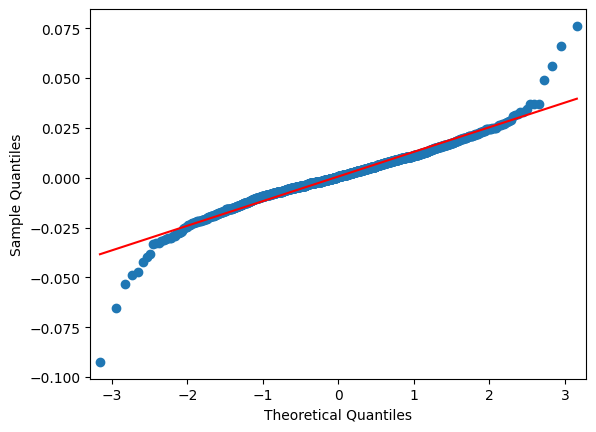

In [41]:
sm.qqplot(sbux['return'].dropna(), line='s');

## Q-Q plots with LOG returns

In [42]:
x_list = np.linspace(
    sbux['log_return'].min(),
    sbux['log_return'].max(),
    100)

In [43]:
y_list = norm.pdf(x_list,
                  loc = sbux['log_return'].mean(),
                  scale = sbux['log_return'].std())

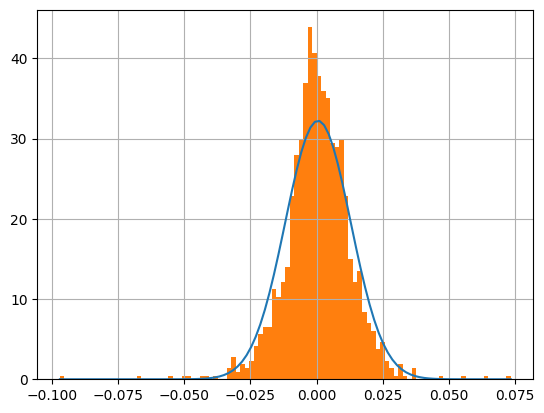

In [44]:
plt.plot(x_list,y_list);
sbux['log_return'].hist(bins=100,density=True);

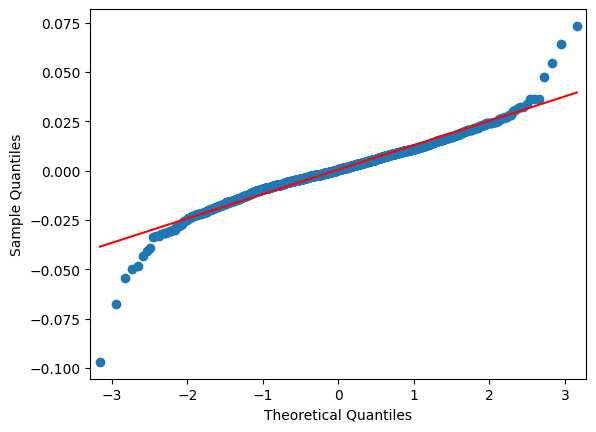

In [45]:
sm.qqplot(sbux['log_return'].dropna(), line='s');

## t-distribution

In [46]:
from scipy.stats import t

In [47]:
x_list = np.linspace(
    sbux['return'].min(),
    sbux['return'].max(),
    100)

In [50]:
params = t.fit(sbux['return'].dropna())
params

(np.float64(4.78753221828017),
 np.float64(0.0007108616716254146),
 np.float64(0.009341981642040986))

In [51]:
df, loc, scale = params

In [52]:
y_list = t.pdf(x_list,df,loc,scale)

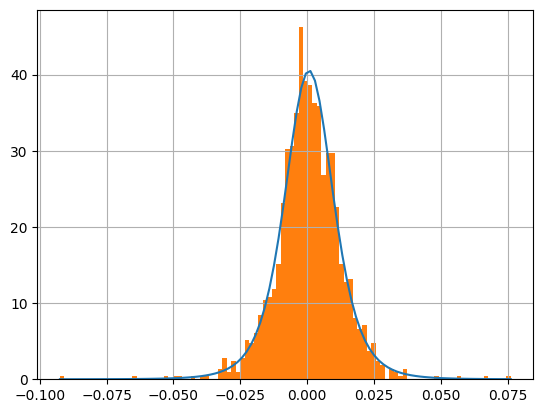

In [53]:
plt.plot(x_list,y_list);
sbux['return'].hist(bins=100,density=True);

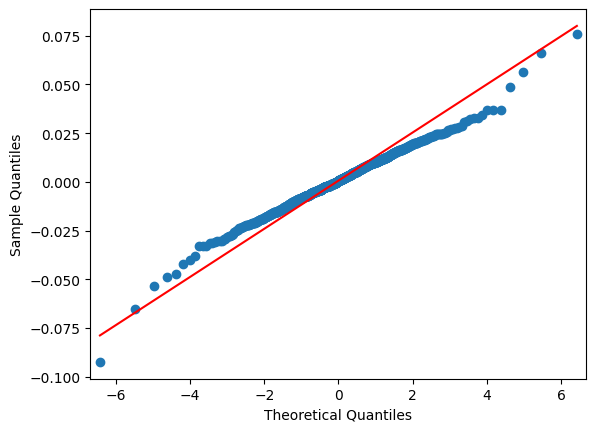

In [60]:
class myt:
  def __init__(self,df):
    self.df = df

  def fit(self,x):
    return t.fit(x)

  def ppf(self,x, loc=0, scale=1):
    return t.ppf(x,self.df,loc,scale)

sm.qqplot(sbux['return'].dropna(), dist=myt(df),line='s');